In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-04T20:58:30.204667+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

seaborn: 0.13.2
sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
teeplot: 1.4.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Alpha+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.811981201171875e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.48200535774230957}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.004099607467651367}
!!! {"init_...": 0.0006210803985595703}
!!! {"ete3Tree": 0.65130615234375}
!!! {"GenomeTree_hierarchical": 0.0028629302978515625}
!!! {"mutateBranchETEhierarchy": 0.09431171417236328}
!!! {"write_genome_short": 0.04894757270812988}


  4%|▍         | 8/193 [00:03<00:53,  3.43it/s]

!!! {"writeGenomeNoIndels": 0.17371845245361328}
!!! {"pl.DataFrame": 0.044959306716918945}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 1.026414394378662}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.017255306243896484}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003351926803588867}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013756752014160156}
!!! {"init_...": 0.0004885196685791016}
!!! {"ete3Tree": 7.605552673339844e-05}
!!! {"GenomeTree_hierarchical": 0.0021371841430664062}
!!! {"mutateBranchETEhierarchy": 1.3589859008789062e-05}
!!! {"write_genome_short": 7.152557373046

 10%|█         | 20/193 [00:03<00:15, 10.93it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.004121541976928711}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013566017150878906}
!!! {"init_...": 0.0004892349243164062}
!!! {"ete3Tree": 0.0008420944213867188}
!!! {"GenomeTree_hierarchical": 0.002958059310913086}
!!! {"mutateBranchETEhierarchy": 0.00013518333435058594}
!!! {"write_genome_short": 0.00014734268188476562}
!!! {"writeGenomeNoIndels": 0.00024127960205078125}
!!! {"pl.DataFrame": 0.00018262863159179688}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006898164749145508}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00032830238342285156}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.5974044799804688e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd

 13%|█▎        | 26/193 [00:03<00:11, 14.63it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.6941299438476562e-05}
len(phylogeny_df)=3365, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.008358955383300781}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014090538024902344}
!!! {"init_...": 0.0004849433898925781}
!!! {"ete3Tree": 0.019979238510131836}
!!! {"GenomeTree_hierarchical": 0.002045869827270508}
!!! {"mutateBranchETEhierarchy": 0.004967451095581055}
!!! {"write_genome_short": 0.002392292022705078}
!!! {"writeGenomeNoIndels": 0.007920980453491211}
!!! {"pl.DataFrame": 0.0015912055969238281}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04135298728942871}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000954627

 19%|█▉        | 37/193 [00:03<00:06, 23.84it/s]

!!! {"write_genome_short": 0.0006105899810791016}
!!! {"writeGenomeNoIndels": 7.867813110351562e-06}
!!! {"pl.DataFrame": 9.679794311523438e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005387544631958008}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00026702880859375}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=60, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003305673599243164}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013637542724609375}
!!! {"init_...": 0.0004811286926269531}
!!! {"ete3Tree": 0.0004284381866455078}
!!! {"GenomeTree_hierarchical": 0.0021660327911376953}
!!! {"mutateBranchETEhierarchy": 8.7499618

 22%|██▏       | 42/193 [00:03<00:05, 26.48it/s]

!!! {"phastSimRun": 0.0001423358917236328}
!!! {"init_...": 0.0006582736968994141}
!!! {"ete3Tree": 8.535385131835938e-05}
!!! {"GenomeTree_hierarchical": 0.0021958351135253906}
!!! {"mutateBranchETEhierarchy": 5.14984130859375e-05}
!!! {"write_genome_short": 8.034706115722656e-05}
!!! {"writeGenomeNoIndels": 1.1682510375976562e-05}
!!! {"pl.DataFrame": 0.00011134147644042969}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005670070648193359}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002880096435546875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003243684768676758}
enter log_context_duration for _d

 28%|██▊       | 54/193 [00:04<00:03, 37.83it/s]

!!! {"phastSimRun": 0.00013589859008789062}
!!! {"init_...": 0.0006322860717773438}
!!! {"ete3Tree": 7.987022399902344e-05}
!!! {"GenomeTree_hierarchical": 0.002200603485107422}
!!! {"mutateBranchETEhierarchy": 1.3589859008789062e-05}
!!! {"write_genome_short": 7.390975952148438e-05}
!!! {"writeGenomeNoIndels": 1.0728836059570312e-05}
!!! {"pl.DataFrame": 0.00010371208190917969}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005469322204589844}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002658367156982422}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=19, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0033330917358398438}
enter log_context_duration fo

 34%|███▍      | 66/193 [00:04<00:02, 45.78it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.288818359375e-05}
len(phylogeny_df)=27, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0036537647247314453}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013208389282226562}
!!! {"init_...": 0.0004642009735107422}
!!! {"ete3Tree": 0.00023245811462402344}
!!! {"GenomeTree_hierarchical": 0.0022575855255126953}
!!! {"mutateBranchETEhierarchy": 4.6253204345703125e-05}
!!! {"write_genome_short": 9.131431579589844e-05}
!!! {"writeGenomeNoIndels": 6.890296936035156e-05}
!!! {"pl.DataFrame": 0.000125885009765625}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005263090133666992}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002992

 40%|████      | 78/193 [00:04<00:02, 48.23it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.3126602172851562e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003509044647216797}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013399124145507812}
!!! {"init_...": 0.0004887580871582031}
!!! {"ete3Tree": 7.414817810058594e-05}
!!! {"GenomeTree_hierarchical": 0.002291440963745117}
!!! {"mutateBranchETEhierarchy": 1.2159347534179688e-05}
!!! {"write_genome_short": 8.511543273925781e-05}
!!! {"writeGenomeNoIndels": 7.152557373046875e-06}
!!! {"pl.DataFrame": 0.00010609626770019531}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0050506591796875}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002789

 44%|████▎     | 84/193 [00:04<00:02, 39.51it/s]

!!! {"ete3Tree": 0.021679401397705078}
!!! {"GenomeTree_hierarchical": 0.0021162033081054688}
!!! {"mutateBranchETEhierarchy": 0.0048482418060302734}
!!! {"write_genome_short": 0.002523660659790039}
!!! {"writeGenomeNoIndels": 0.008460044860839844}
!!! {"pl.DataFrame": 0.001695394515991211}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04373764991760254}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0010039806365966797}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=3416, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.008380413055419922}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014972686767578125}
!!! {"init_...": 0.00046753

 50%|████▉     | 96/193 [00:05<00:02, 42.93it/s]

!!! {"write_genome_short": 0.0005965232849121094}
!!! {"writeGenomeNoIndels": 6.580352783203125e-05}
!!! {"pl.DataFrame": 0.00010895729064941406}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005757331848144531}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00026702880859375}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=4316, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.009715080261230469}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00015020370483398438}
!!! {"init_...": 0.0004658699035644531}
!!! {"ete3Tree": 0.025608062744140625}
!!! {"GenomeTree_hierarchical": 0.0026373863220214844}
!!! {"mutateBranchETEhierarchy": 0.005839

 52%|█████▏    | 101/193 [00:05<00:02, 41.56it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0004756450653076172}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003165721893310547}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001361370086669922}
!!! {"init_...": 0.000431060791015625}
!!! {"ete3Tree": 6.365776062011719e-05}
!!! {"GenomeTree_hierarchical": 0.002187490463256836}
!!! {"mutateBranchETEhierarchy": 1.1205673217773438e-05}
!!! {"write_genome_short": 8.654594421386719e-05}
!!! {"writeGenomeNoIndels": 6.67572021484375e-06}
!!! {"pl.DataFrame": 8.7738037109375e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004570960998535156}
enter log_context_duration for resto

 59%|█████▊    | 113/193 [00:05<00:01, 46.87it/s]

!!! {"phastSimRun": 0.0001308917999267578}
!!! {"init_...": 0.0006194114685058594}
!!! {"ete3Tree": 7.104873657226562e-05}
!!! {"GenomeTree_hierarchical": 0.002162933349609375}
!!! {"mutateBranchETEhierarchy": 1.2159347534179688e-05}
!!! {"write_genome_short": 7.033348083496094e-05}
!!! {"writeGenomeNoIndels": 6.9141387939453125e-06}
!!! {"pl.DataFrame": 9.584426879882812e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005301713943481445}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002391338348388672}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.5974044799804688e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003119945526123047}
enter log_context_duration for _d

 64%|██████▍   | 124/193 [00:05<00:01, 47.83it/s]

!!! {"phastSimRun": 0.00016999244689941406}
!!! {"init_...": 0.0006237030029296875}
!!! {"ete3Tree": 7.796287536621094e-05}
!!! {"GenomeTree_hierarchical": 0.002282857894897461}
!!! {"mutateBranchETEhierarchy": 1.430511474609375e-05}
!!! {"write_genome_short": 7.43865966796875e-05}
!!! {"writeGenomeNoIndels": 7.152557373046875e-06}
!!! {"pl.DataFrame": 0.00011706352233886719}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005751848220825195}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003037452697753906}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=228, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0036401748657226562}
enter log_context_duration for 

 70%|███████   | 136/193 [00:05<00:01, 52.68it/s]

exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005838871002197266}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002703666687011719}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003238677978515625}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012612342834472656}
!!! {"init_...": 0.0004982948303222656}
!!! {"ete3Tree": 7.748603820800781e-05}
!!! {"GenomeTree_hierarchical": 0.002226591110229492}
!!! {"mutateBranchETEhierarchy": 1.4543533325195312e-05}
!!! {"write_genome_short": 7.462501525878906e-05}
!!! {"writeGenomeNoIndels": 1.0728836059570312e-05}
!!! {"pl.DataFrame": 0.00010

 74%|███████▎  | 142/193 [00:05<00:00, 53.97it/s]

!!! {"write_genome_short": 0.0005946159362792969}
!!! {"writeGenomeNoIndels": 8.106231689453125e-06}
!!! {"pl.DataFrame": 0.00011205673217773438}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0065746307373046875}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003361701965332031}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032918453216552734}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014591217041015625}
!!! {"init_...": 0.0005068778991699219}
!!! {"ete3Tree": 7.915496826171875e-05}
!!! {"GenomeTree_hierarchical": 0.002363920211791992}
!!! {"mutateBranchETEhierarchy": 1.4066

 80%|███████▉  | 154/193 [00:06<00:00, 44.89it/s]

!!! {"pl.DataFrame": 0.003038644790649414}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.05672001838684082}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0012409687042236328}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=4147, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.009042024612426758}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00015664100646972656}
!!! {"init_...": 0.00046706199645996094}
!!! {"ete3Tree": 0.023405075073242188}
!!! {"GenomeTree_hierarchical": 0.002253293991088867}
!!! {"mutateBranchETEhierarchy": 0.006339550018310547}
!!! {"write_genome_short": 0.0031638145446777344}
!!! {"writeGenomeNoIndels": 0.0100040

 82%|████████▏ | 159/193 [00:07<00:02, 14.19it/s]

!!! {"ete3Tree": 0.7084701061248779}
!!! {"GenomeTree_hierarchical": 0.002171039581298828}
!!! {"mutateBranchETEhierarchy": 0.03400087356567383}
!!! {"write_genome_short": 0.020269393920898438}
!!! {"writeGenomeNoIndels": 0.055466651916503906}
!!! {"pl.DataFrame": 0.010199308395385742}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.833867073059082}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0043294429779052734}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.09808349609375e-05}
len(phylogeny_df)=30512, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.053529977798461914}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00015306472778320312}
!!! {"init_...": 0.0005595684051513

 84%|████████▍ | 163/193 [00:07<00:02, 11.92it/s]

!!! {"mutateBranchETEhierarchy": 0.04665184020996094}
!!! {"write_genome_short": 0.025473833084106445}
!!! {"writeGenomeNoIndels": 0.07594442367553711}
!!! {"pl.DataFrame": 0.012694120407104492}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.3383498191833496}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.005967617034912109}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032591819763183594}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001392364501953125}
!!! {"init_...": 0.0004954338073730469}
!!! {"ete3Tree": 8.535385131835938e-05}
!!! {"GenomeTree_hierarchical": 0.002228736877441

 87%|████████▋ | 167/193 [00:07<00:01, 14.29it/s]

!!! {"write_genome_short": 0.0009827613830566406}
!!! {"writeGenomeNoIndels": 0.0014989376068115234}
!!! {"pl.DataFrame": 0.00038623809814453125}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.012311458587646484}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0004296302795410156}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=1503, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.005509138107299805}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013518333435058594}
!!! {"init_...": 0.0004627704620361328}
!!! {"ete3Tree": 0.00934600830078125}
!!! {"GenomeTree_hierarchical": 0.0020389556884765625}
!!! {"mutateBranchETEhierarchy": 0.0020

 92%|█████████▏| 177/193 [00:08<00:00, 20.56it/s]

!!! {"ete3Tree": 0.06479287147521973}
!!! {"GenomeTree_hierarchical": 0.002097606658935547}
!!! {"mutateBranchETEhierarchy": 0.016542673110961914}
!!! {"write_genome_short": 0.008642196655273438}
!!! {"writeGenomeNoIndels": 0.026351451873779297}
!!! {"pl.DataFrame": 0.004665374755859375}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.12604832649230957}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0024673938751220703}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003215312957763672}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014257431030273438}
!!! {"init_...": 0.00050592422485

 94%|█████████▍| 182/193 [00:08<00:00, 24.62it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.6941299438476562e-05}
len(phylogeny_df)=1575, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.005770683288574219}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013303756713867188}
!!! {"init_...": 0.0004744529724121094}
!!! {"ete3Tree": 0.008865833282470703}
!!! {"GenomeTree_hierarchical": 0.0027360916137695312}
!!! {"mutateBranchETEhierarchy": 0.0022122859954833984}
!!! {"write_genome_short": 0.0013210773468017578}
!!! {"writeGenomeNoIndels": 0.0036470890045166016}
!!! {"pl.DataFrame": 0.0008158683776855469}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.021932125091552734}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0006

100%|██████████| 193/193 [00:08<00:00, 22.39it/s]

!!! {"write_genome_short": 0.004467964172363281}
!!! {"writeGenomeNoIndels": 0.012045860290527344}
!!! {"pl.DataFrame": 0.0022194385528564453}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.061818838119506836}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00133514404296875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003234386444091797}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001399517059326172}
!!! {"init_...": 0.0004863739013671875}
!!! {"ete3Tree": 7.653236389160156e-05}
!!! {"GenomeTree_hierarchical": 0.0021839141845703125}
!!! {"mutateBranchETEhierarchy": 1.38282775878

exit log_context_duration for extract variant
!!! {"extract variant": 0.09628129005432129}
enter log_context_duration for prepend sequence
exit log_context_duration for prepend sequence
!!! {"prepend sequence": 0.26373934745788574}
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for phylo_df.merge
exit log_context_duration for phylo_df.merge
!!! {"phylo_df.merge": 0.03637814521789551}
enter log_context_duration for _add_sequence_diffs


  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0026030540466308594}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03321433067321777}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0021376609802246094}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0027875900268554688}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.033190011978149414}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0027756690979003906}
enter log_context_duration for se

 43%|████▎     | 3/7 [00:00<00:00, 22.83it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03363323211669922}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0036134719848632812}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0024170875549316406}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.04068779945373535}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0035347938537597656}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.003922939300537109}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.0994415283203125e-06}
enter log_context_duration for mismatches


100%|██████████| 7/7 [00:00<00:00, 23.18it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03327465057373047}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0024156570434570312}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002424001693725586}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03332948684692383}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003922224044799805}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0014655590057373047}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.0994415283203125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mism

exit log_context_duration for _add_sequence_diffs
!!! {"_add_sequence_diffs": 0.3880488872528076}
sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.25552964210510254}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 35
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 36
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)

100%|██████████| 4086/4086 [00:25<00:00, 158.64it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 29.219690084457397}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 4086/4086 [00:06<00:00, 615.99it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 139.59198427200317}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.061676740646362305}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 202.33827757835388}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.009250640869140625}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.0003490447998046875}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.0004181861877441406}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.0004405975341796875}
ancestral


100%|██████████| 368/368 [00:00<00:00, 200481.08it/s]

process mutations:   0%|          | 1/368 [00:00<01:18,  4.65it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:15<11:53,  1.98s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   17.1s



process mutations:  13%|█▎        | 48/368 [00:54<05:53,  1.10s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.0min



process mutations:  24%|██▍       | 88/368 [01:36<05:01,  1.08s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  1.7min



process mutations:  35%|███▍      | 128/368 [02:19<04:17,  1.07s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  2.5min



process mutations:  46%|████▌     | 168/368 [03:01<03:31,  1.06s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  3.2min



process mutations:  57%|█████▋    | 208/368 [03:41<02:47,  1.05s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  3.9min



process mutations:  67%|██████▋   | 248/368 [04:24<02:06,  1.05s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  4.7min



process mutations:  78%|███████▊  | 288/368 [05:07<01:24,  1.06s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  5.4min



process mutations:  89%|████████▉ | 328/368 [05:51<00:42,  1.07s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  6.1min



process mutations: 100%|██████████| 368/368 [06:37<00:00,  1.08s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  6.6min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  6.7min finished


process replicate: 100%|██████████| 1/1 [10:13<00:00, 613.05s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.08128547668457031}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 110
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> '24a590ab-c02a-85d5-89a2-be9f519f0044', '24a590ab-c02a-85d5-89a2-be9f519f0044', '24a590ab-c02a-85d5-89a2-be9f51
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 7925, 8040, 7924, 8040, 6882
$ phyo_df_screened_len           <u16> 247, 132, 248, 132, 1290
$ tb_stat                     

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


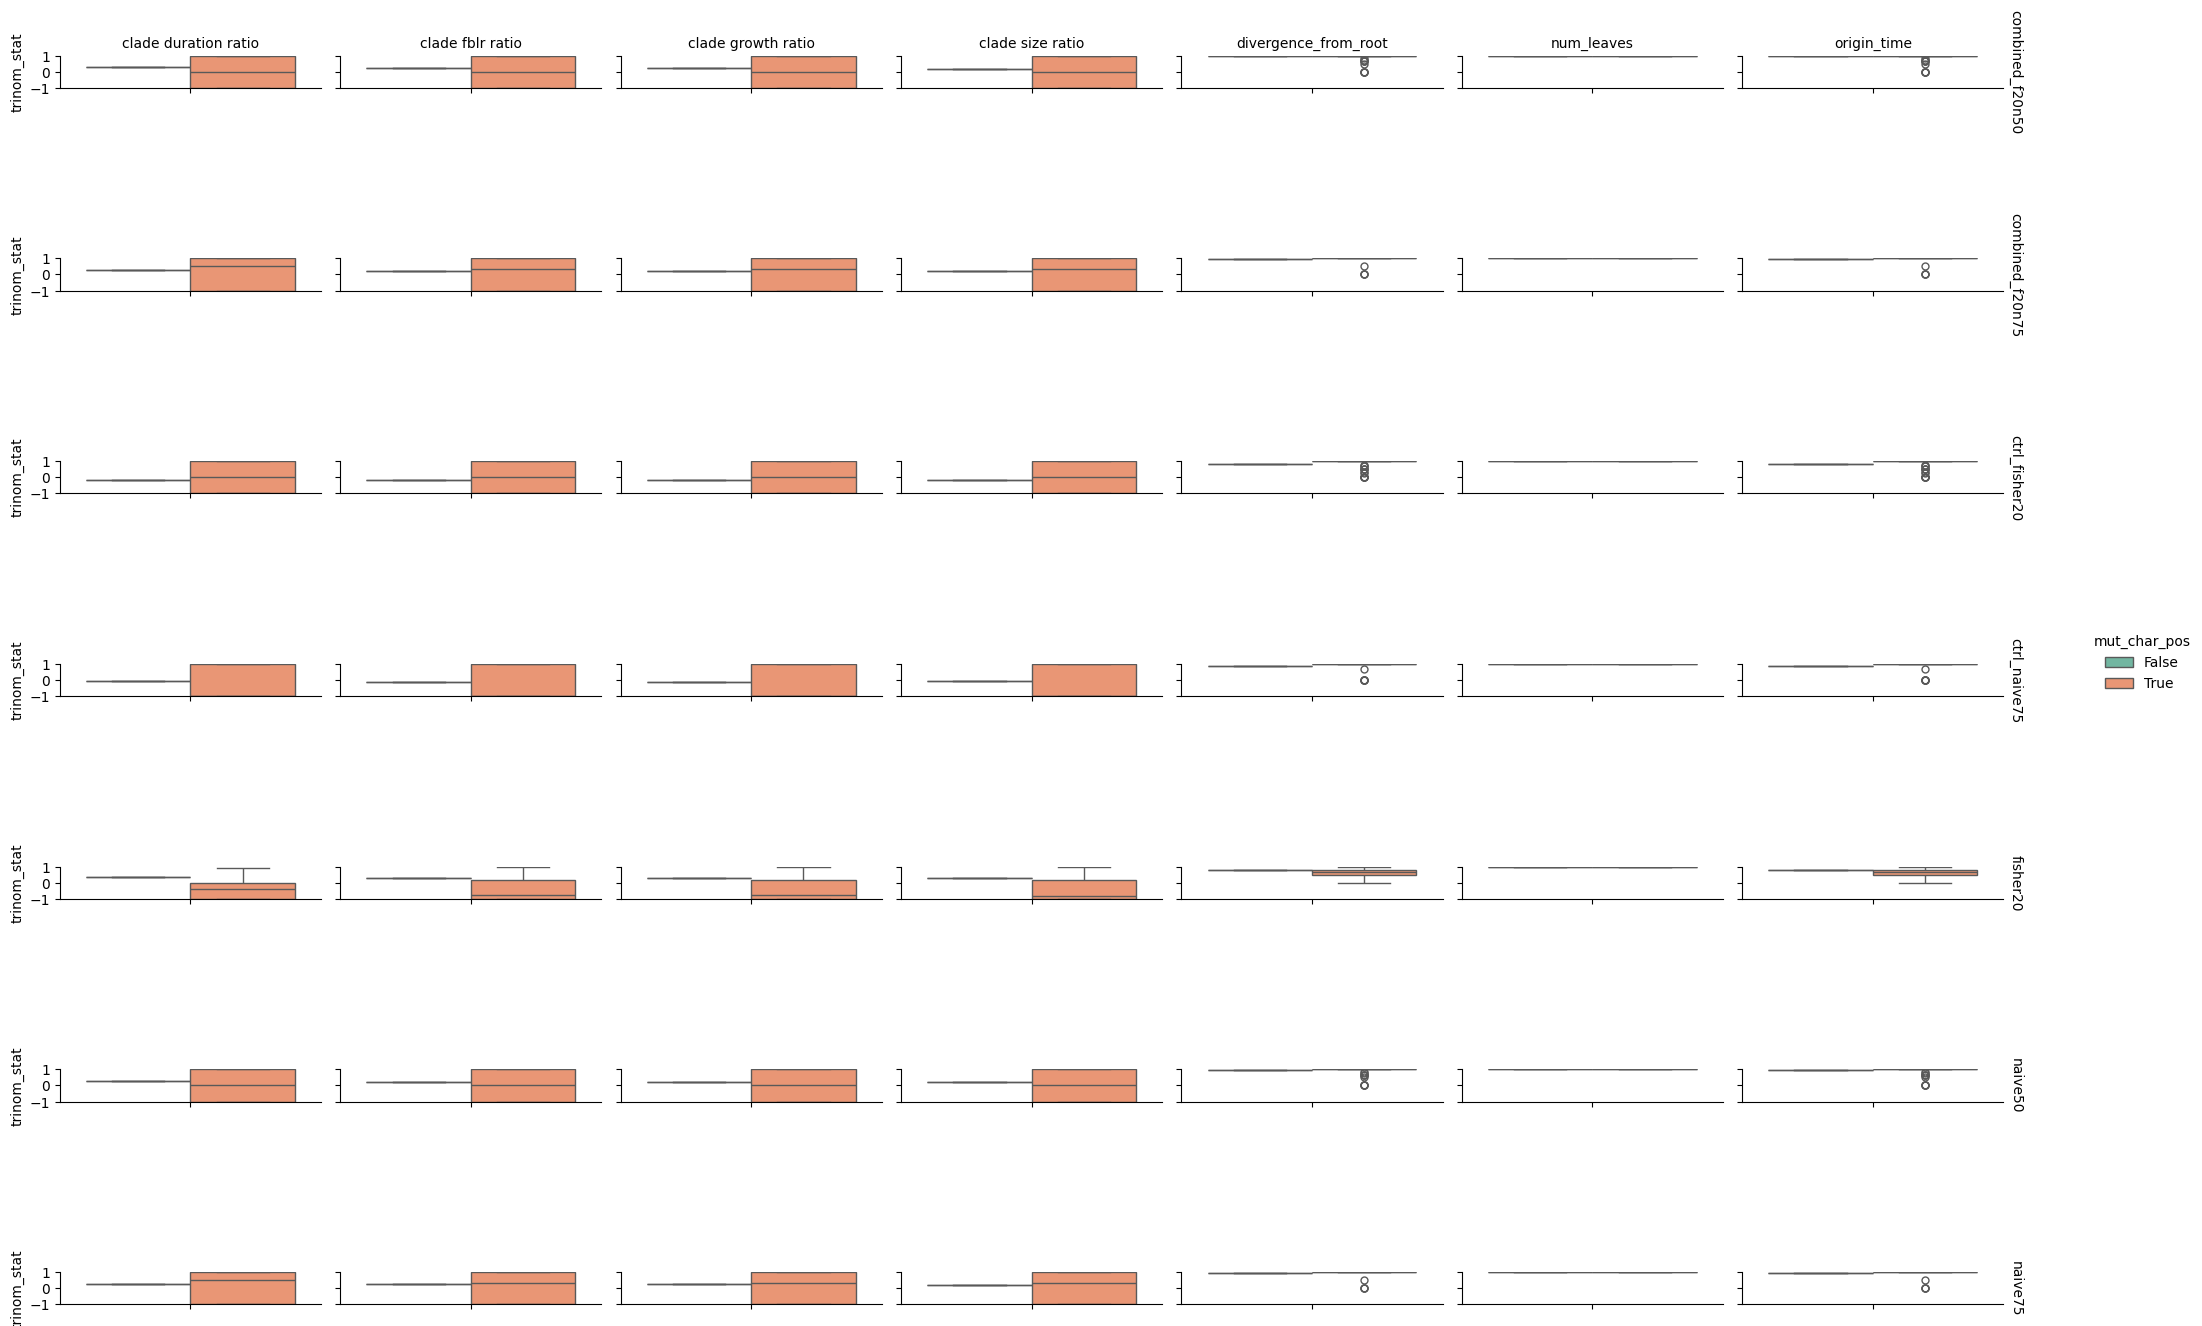

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


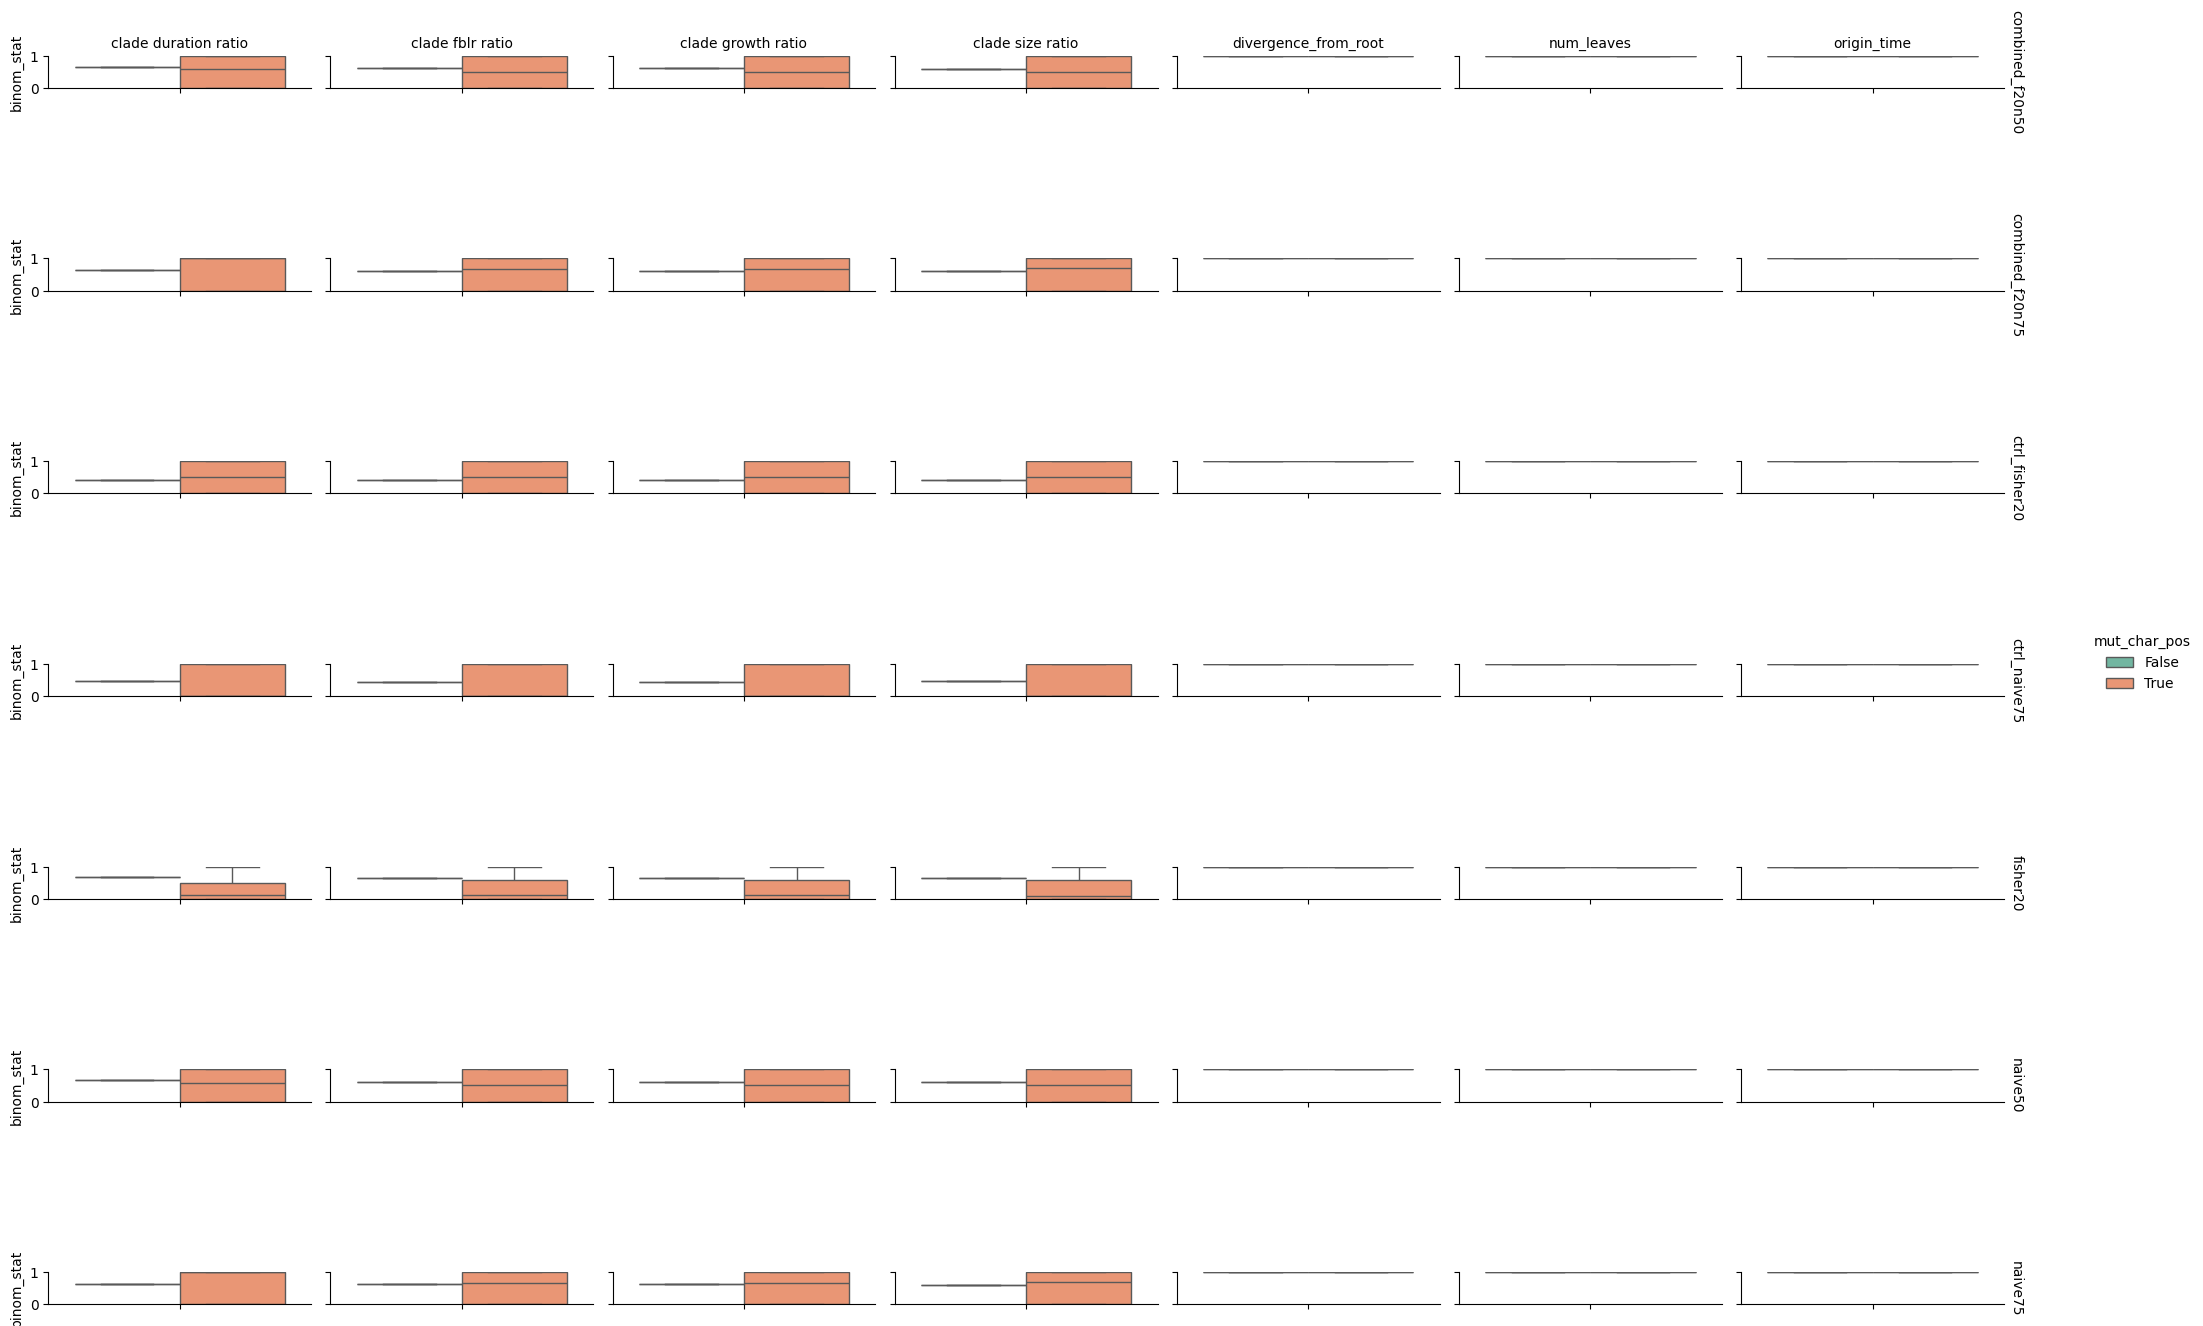

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


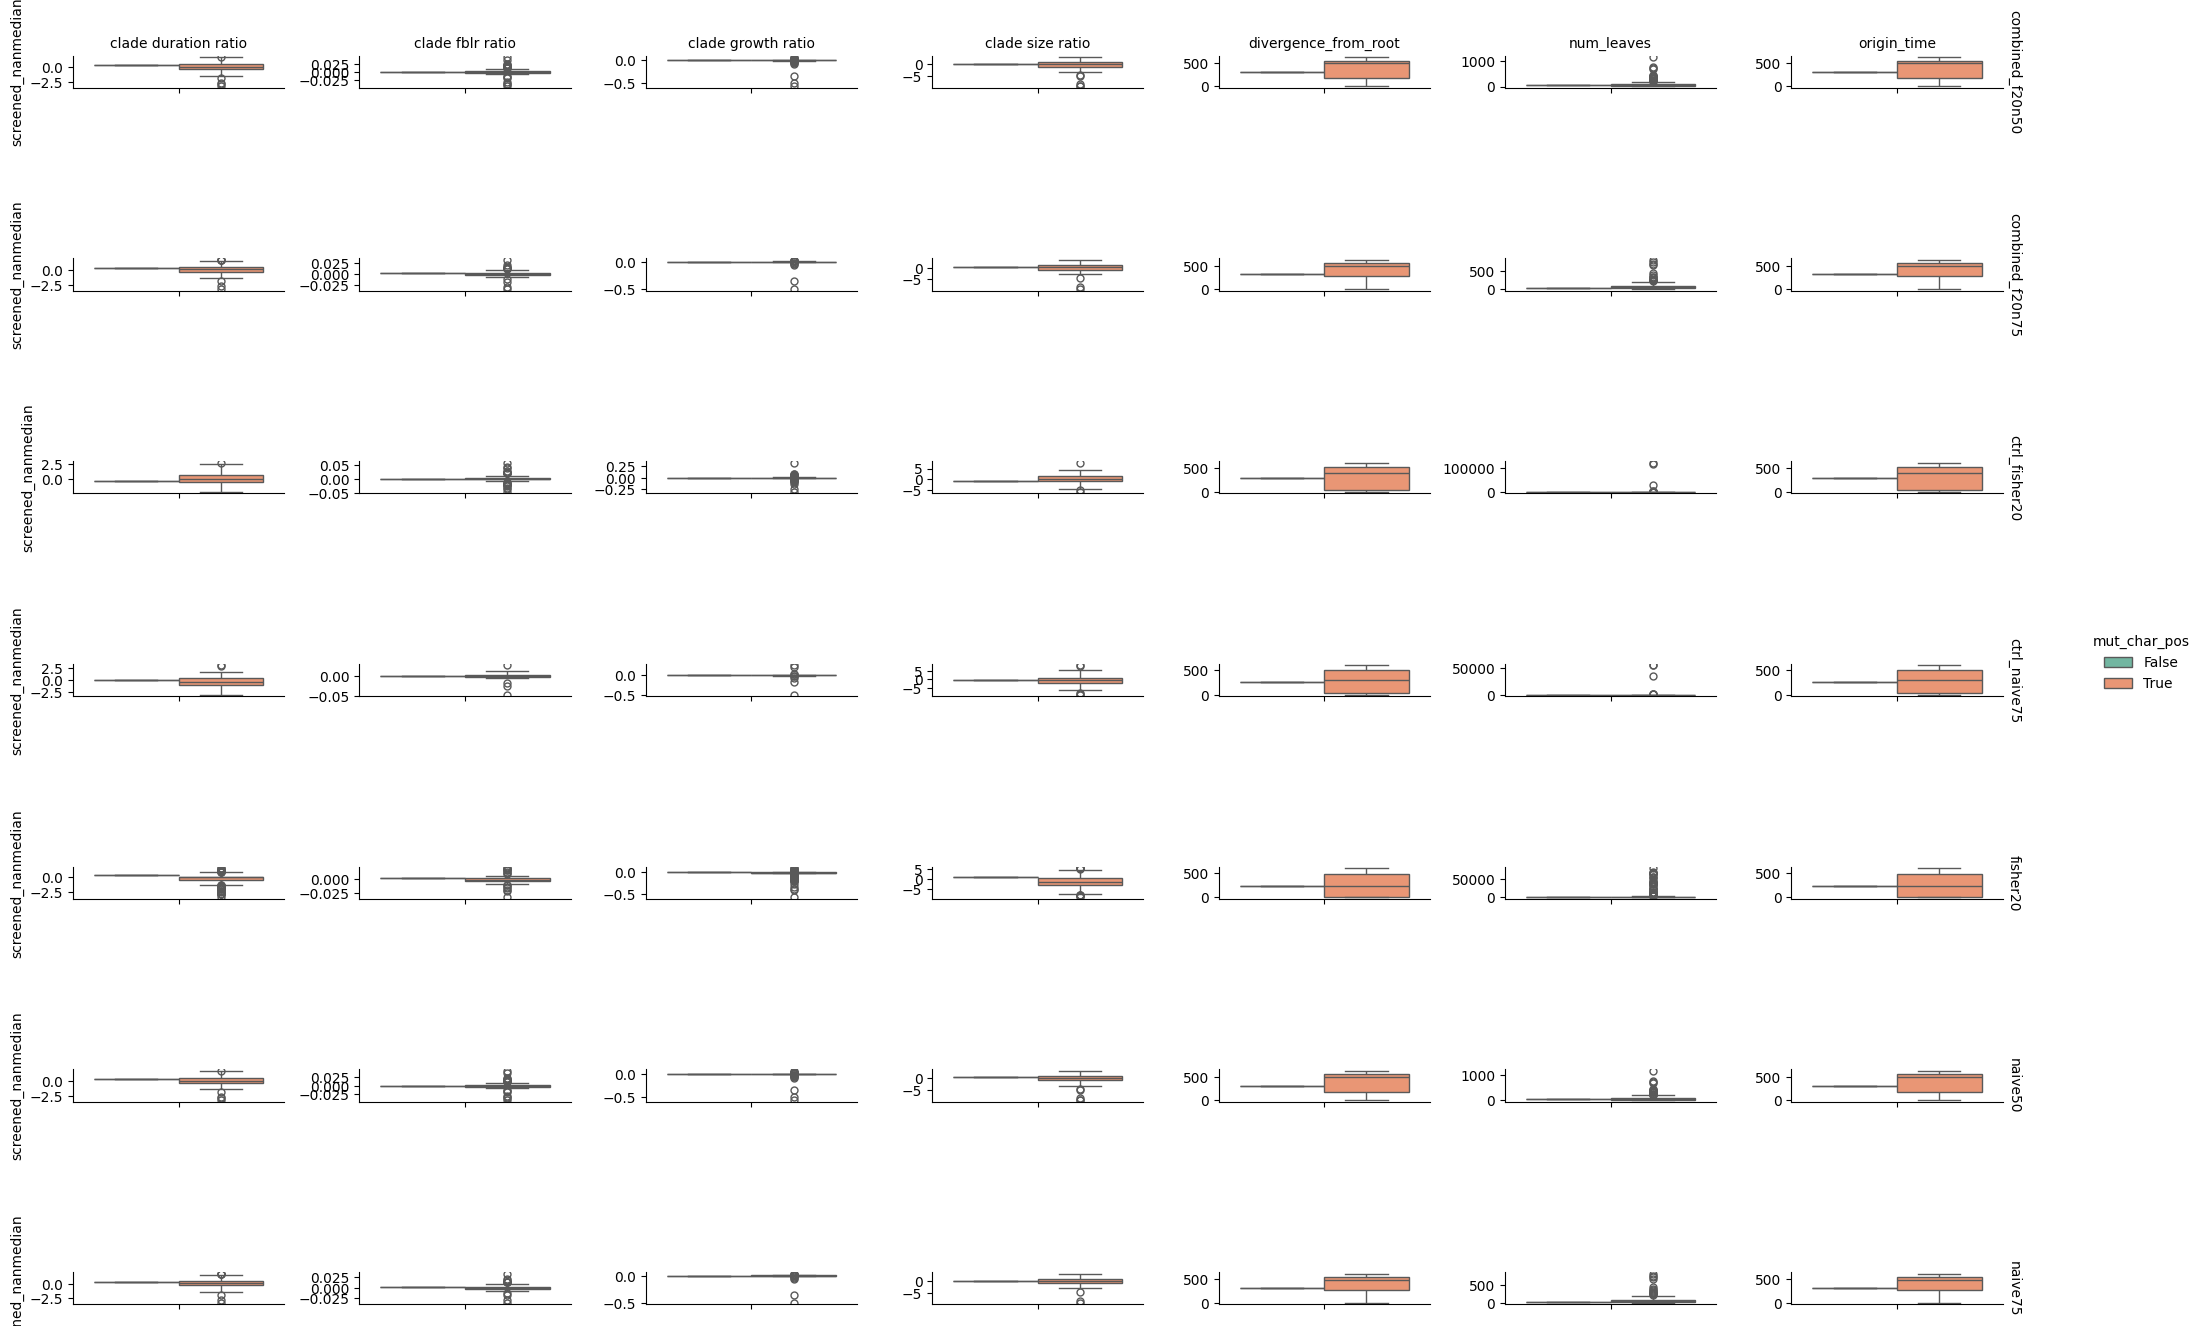

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


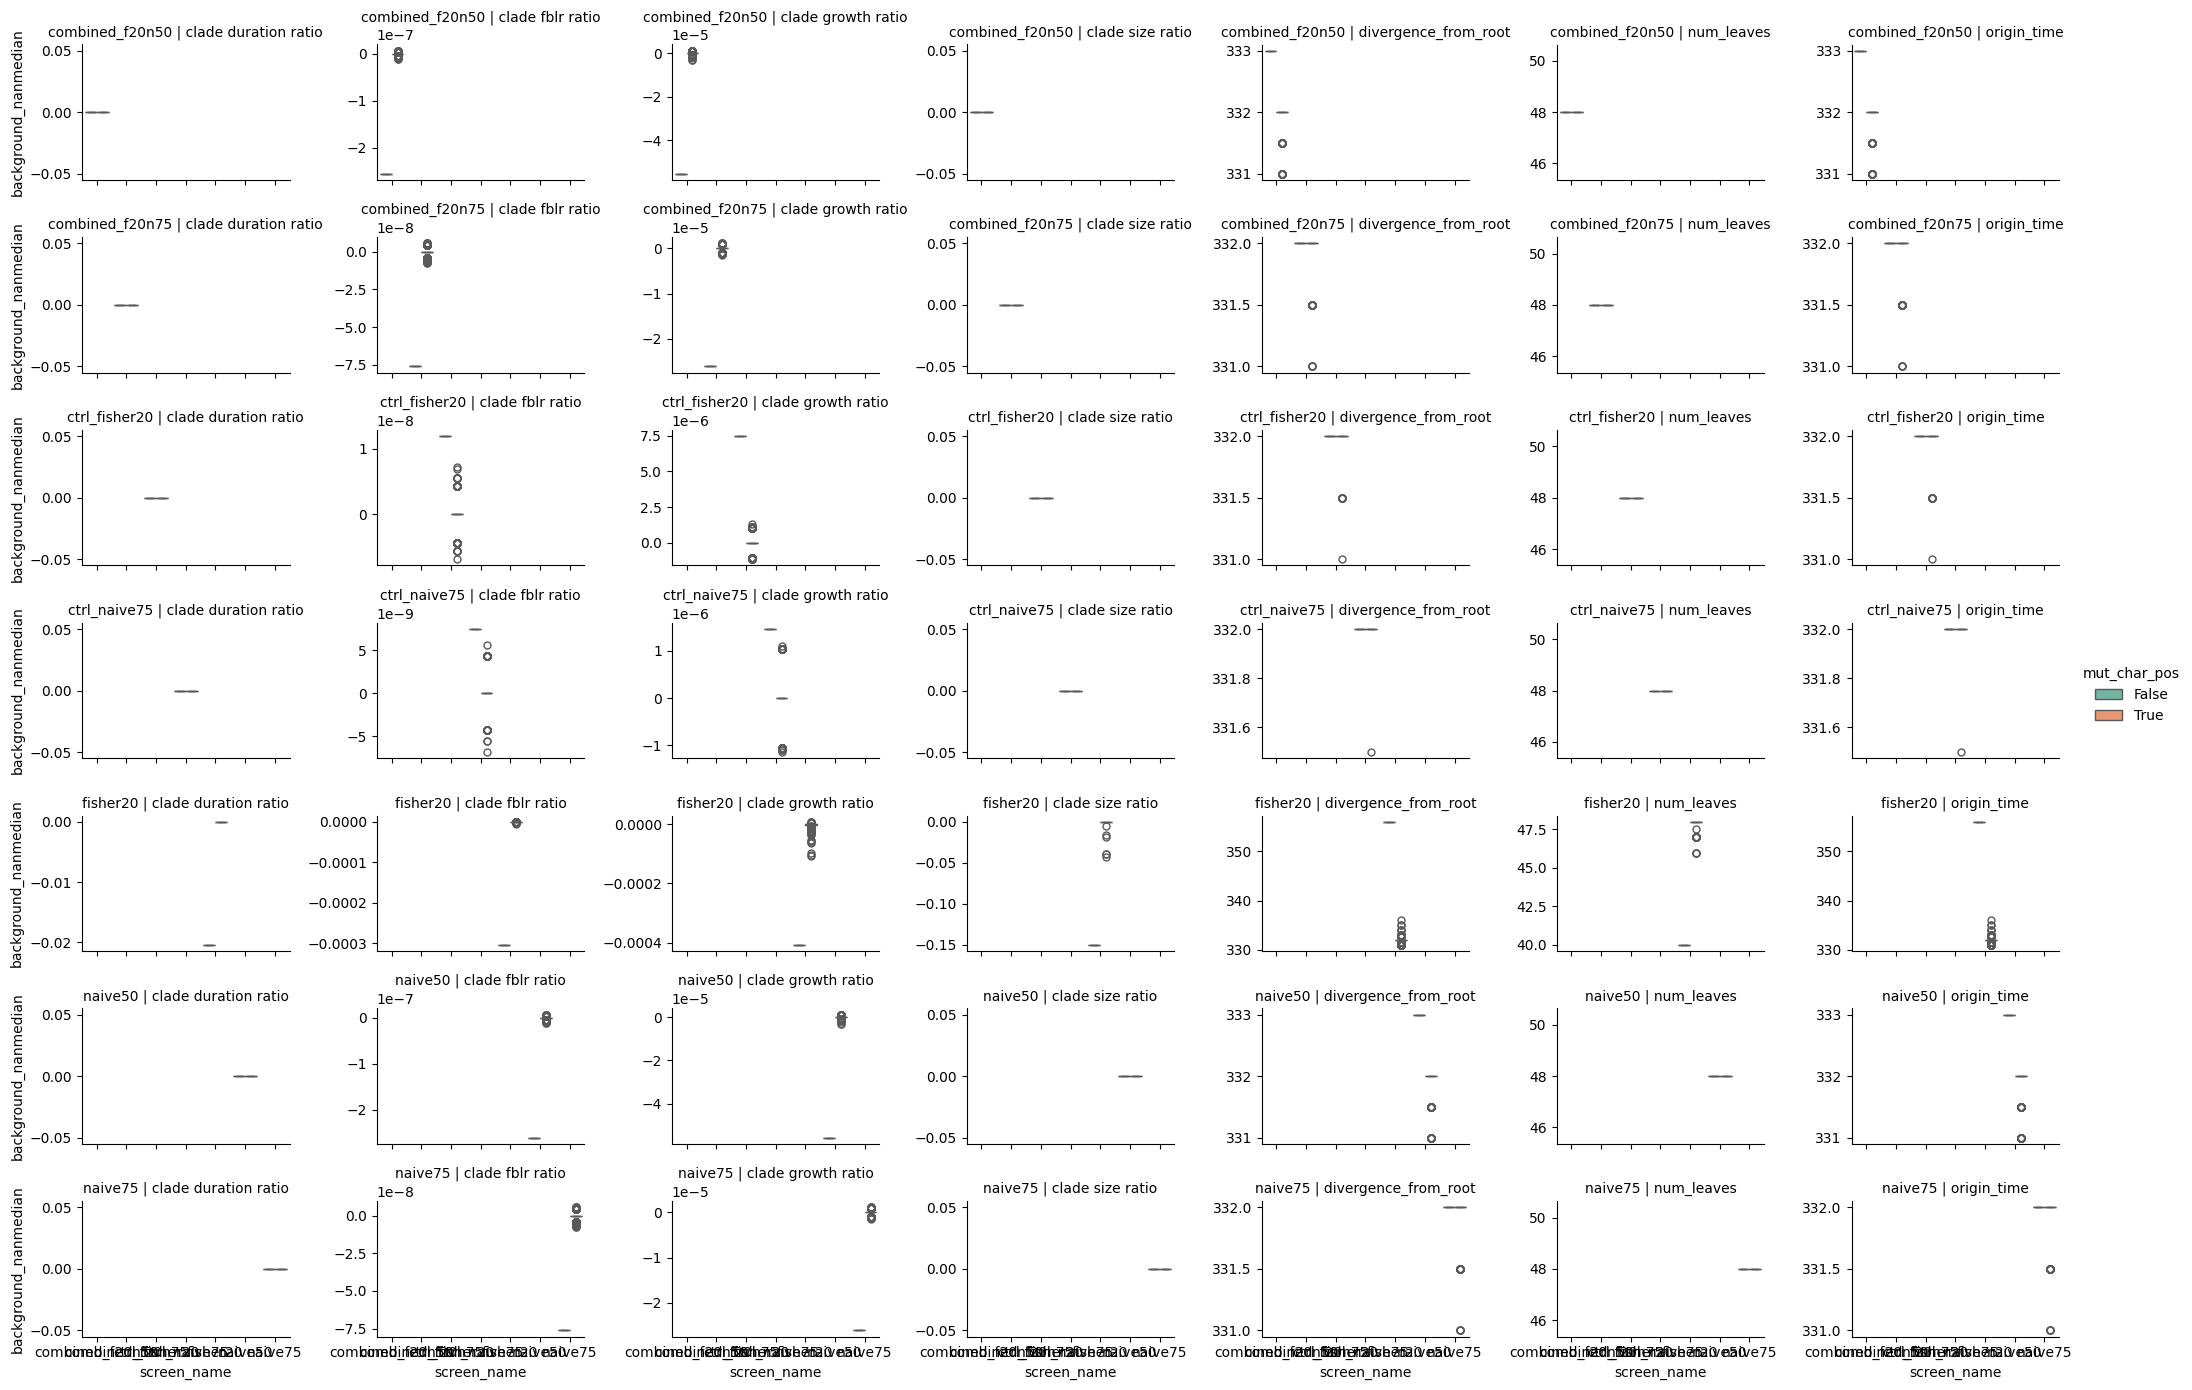

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
